Library

In [677]:
import glob

In [678]:
from PIL import Image

In [679]:
import matplotlib.pyplot as plt

In [680]:
import numpy as np

In [681]:
from sklearn.model_selection import train_test_split

In [682]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

1. DATA COLLECTION

In [684]:
no_smile = glob.glob("C:/Users/rinit/Box/DA Project/JoyScan/non_smile/*.jpg")

In [685]:
smile = glob.glob("C:/Users/rinit/Box/DA Project/JoyScan/smile/*.jpg")

In [686]:
test = glob.glob("C:/Users/rinit/Box/DA Project/JoyScan/test/*.jpg")

In [687]:
len(smile), len(no_smile), len(test)

(600, 603, 12030)

2. DATA CLEANING

In [689]:
print(smile[12])

C:/Users/rinit/Box/DA Project/JoyScan/smile\Jane_Kaczmarek_0002.jpg


In [690]:
img = Image.open(smile[12])

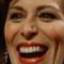

In [691]:
img

In [692]:
img =img.convert('L')

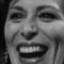

In [693]:
img

In [694]:
pixel_array = np.array(img)

In [695]:
type(pixel_array)

numpy.ndarray

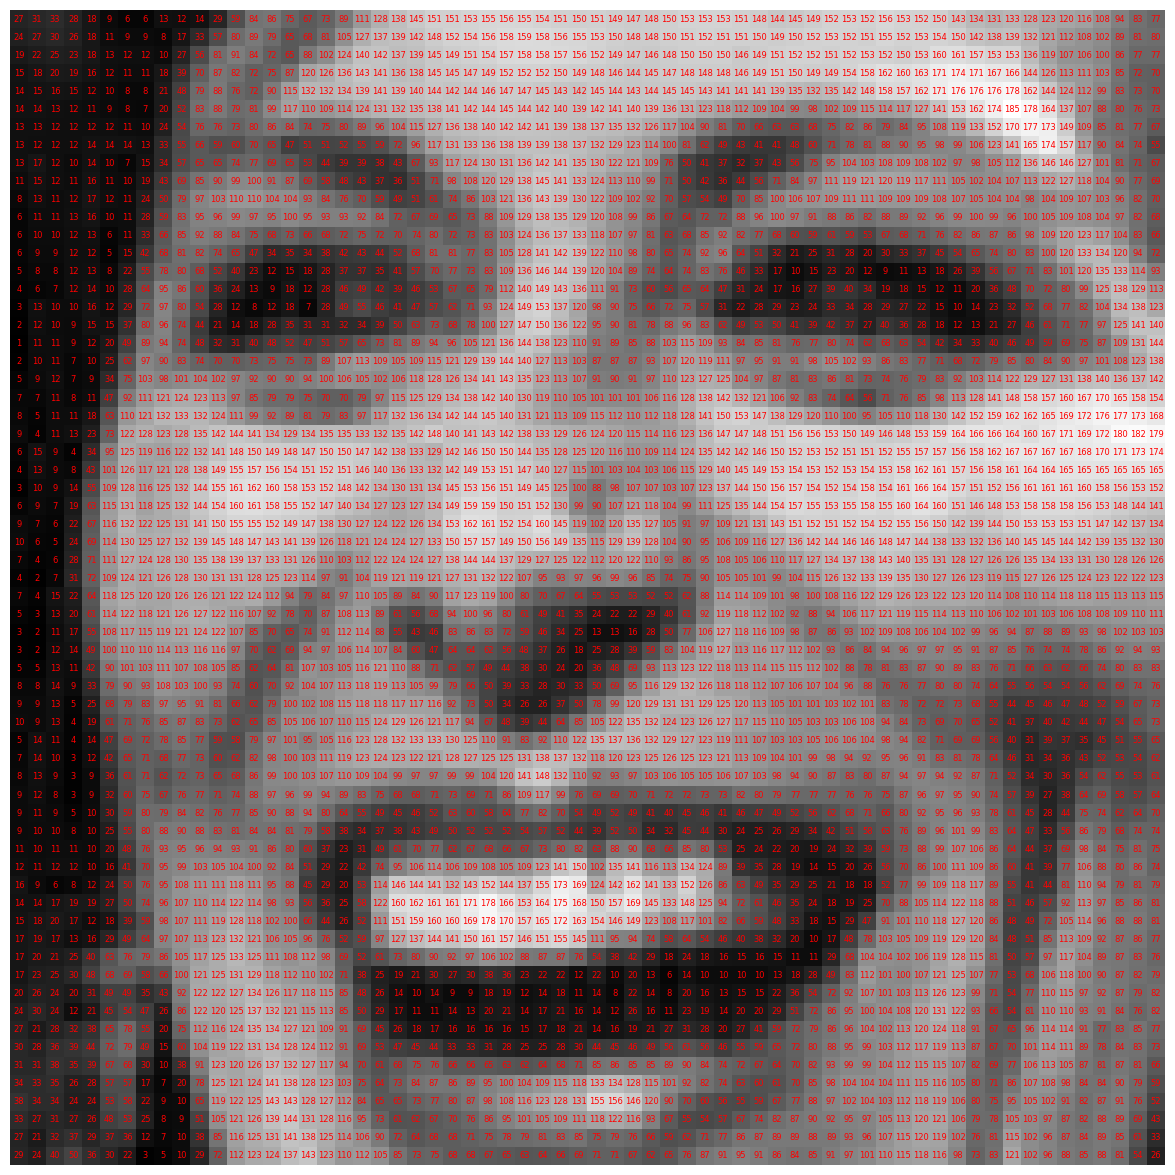

In [696]:
plt.figure(figsize=(15, 15))
plt.imshow(pixel_array, cmap="gray", interpolation="nearest")

# Show pixel values overlaid on image
for i in range(64):
    for j in range(64):
        plt.text(j, i, pixel_array[i, j], ha="center", va="center", fontsize=6, color="red")

plt.axis("off")
plt.show()

In [697]:
data =[]
labels = []

In [698]:
#no_smile images
for image in no_smile:
    img = Image.open(image)
    img = img.convert('L')
    img = np.array(img).flatten()
    data.append(img)
    labels.append(0)

In [699]:
len(data), len(labels)

(603, 603)

In [700]:
#smile images
for image in smile:
    img = Image.open(image)
    img = img.convert('L')
    img = np.array(img).flatten()
    data.append(img)
    labels.append(1)

In [701]:
len(data), len(labels)

(1203, 1203)

In [702]:
type(data)

list

In [703]:
X = np.array(data)

In [704]:
y = np.array(labels)

3. MODEL DEVELOPMENT

In [706]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [707]:
type(X_train)

numpy.ndarray

In [708]:
X_train.shape

(962, 4096)

In [709]:
X_train[0]

array([ 97, 112, 127, ...,  12,  12,  13], dtype=uint8)

In [710]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [711]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [712]:
X_train_scaled[0]

array([-0.02540282,  0.19722396,  0.4011609 , ..., -1.43245076,
       -1.41053727, -1.37453322])

In [713]:
model = LogisticRegression()

In [714]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [715]:
y_pred = model.predict(X_test_scaled)

In [716]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [717]:
model.predict_proba(X_test_scaled)

array([[6.95385583e-06, 9.99993046e-01],
       [2.30101450e-01, 7.69898550e-01],
       [9.89954940e-01, 1.00450595e-02],
       [2.96229707e-11, 1.00000000e+00],
       [1.00000000e+00, 6.33333596e-12],
       [9.94252681e-01, 5.74731878e-03],
       [2.75175072e-07, 9.99999725e-01],
       [9.99995294e-01, 4.70611607e-06],
       [4.74673278e-09, 9.99999995e-01],
       [1.93305312e-04, 9.99806695e-01],
       [5.57950700e-03, 9.94420493e-01],
       [3.61843353e-08, 9.99999964e-01],
       [9.99999908e-01, 9.22715315e-08],
       [9.91507734e-01, 8.49226574e-03],
       [9.99999999e-01, 6.57235039e-10],
       [9.99999926e-01, 7.36524896e-08],
       [2.84461951e-02, 9.71553805e-01],
       [9.99922653e-01, 7.73471035e-05],
       [1.95145352e-08, 9.99999980e-01],
       [9.99993893e-01, 6.10697908e-06],
       [4.03573397e-09, 9.99999996e-01],
       [1.33518556e-02, 9.86648144e-01],
       [9.96992255e-01, 3.00774485e-03],
       [3.69499129e-08, 9.99999963e-01],
       [9.996481

In [718]:
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8921
Confusion Matrix:
 [[114  12]
 [ 14 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       126
           1       0.89      0.88      0.89       115

    accuracy                           0.89       241
   macro avg       0.89      0.89      0.89       241
weighted avg       0.89      0.89      0.89       241



4. HYPERPARAMETER TUNING

In [720]:
from sklearn.model_selection import GridSearchCV

In [721]:
log_reg = LogisticRegression()

In [722]:
param_grid = {
    'penalty' : ['l1','l2', 'elasticnet'],
    'C' : [ 0.01, 0.1, 1, 10, 100],
}

In [723]:
grid_search = GridSearchCV(estimator =model,param_grid= param_grid, n_jobs = -1, cv=5)

Test with new image
* gray scale
* numpy array
* flatten
* scaling

In [726]:
image = Image.open('C:/Users/rinit/Box/DA Project/JoyScan/mysamples/Uddy.jpg')

In [728]:
image = image.resize((64,64))

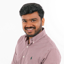

In [730]:
image

In [732]:
image = image.convert('L')

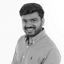

In [734]:
image

In [736]:
image_array = np.array(image).flatten()

In [738]:
image_array.shape

(4096,)

In [740]:
scaled_array = scaler.transform(image_array.reshape(1,-1))

In [744]:
model.predict(scaled_array)

array([0])

Save the model

In [754]:
import pickle

In [758]:
pickle.dump(model, open('JoyScan.pkl', 'wb'))

In [762]:
pickle.dump(scaler, open('my_scaler.pkl','wb'))